# Titanic 데이터 분석



| 변수명           | 설명                                                      | 데이터 타입         |
| ------------- | ------------------------------------------------------- | -------------- |
| `PassengerId` | 탑승자 고유 ID                                               | int            |
| `Survived`    | 생존 여부 (0 = No, 1 = Yes)                                 | int (binary)   |
| `Pclass`      | 선실 등급 (1 = 1st, 2 = 2nd, 3 = 3rd)                       | int (ordinal)  |
| `Name`        | 이름 (성, 이름 구조)                                           | string         |
| `Sex`         | 성별 (male/female)                                        | string         |
| `Age`         | 나이 (정수 또는 소수)                                           | float          |
| `SibSp`       | 함께 탑승한 형제자매/배우자 수                                       | int            |
| `Parch`       | 함께 탑승한 부모/자녀 수                                          | int            |
| `Ticket`      | 티켓 번호                                                   | string         |
| `Fare`        | 요금 (영국 파운드)                                             | float          |
| `Cabin`       | 선실 번호                                                   | string (결측 많음) |
| `Embarked`    | 탑승한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton) | string         |


In [13]:
import os
print(os.getcwd())
print(os.listdir())

c:\workspace\hit_ml_dl\practice
['dataset', 'data_dictionary.png', 'linear_regression', 'titanic.ipynb']


C:\Users\human-14\AppData\Local\Temp\ipykernel_12784\1296814190.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # median 선택 근거?
C:\Users\human-14\AppData\Local\Temp\ipykernel_12784\1296814190.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

NameError: name 'accuracy_score' is not defined

c:\workspace\hit_ml_dl\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\workspace\hit_ml_dl\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\workspace\hit_ml_dl\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\workspace\hit_ml_dl\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\workspace\hit_ml_dl\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\workspace\hit_ml_dl\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 

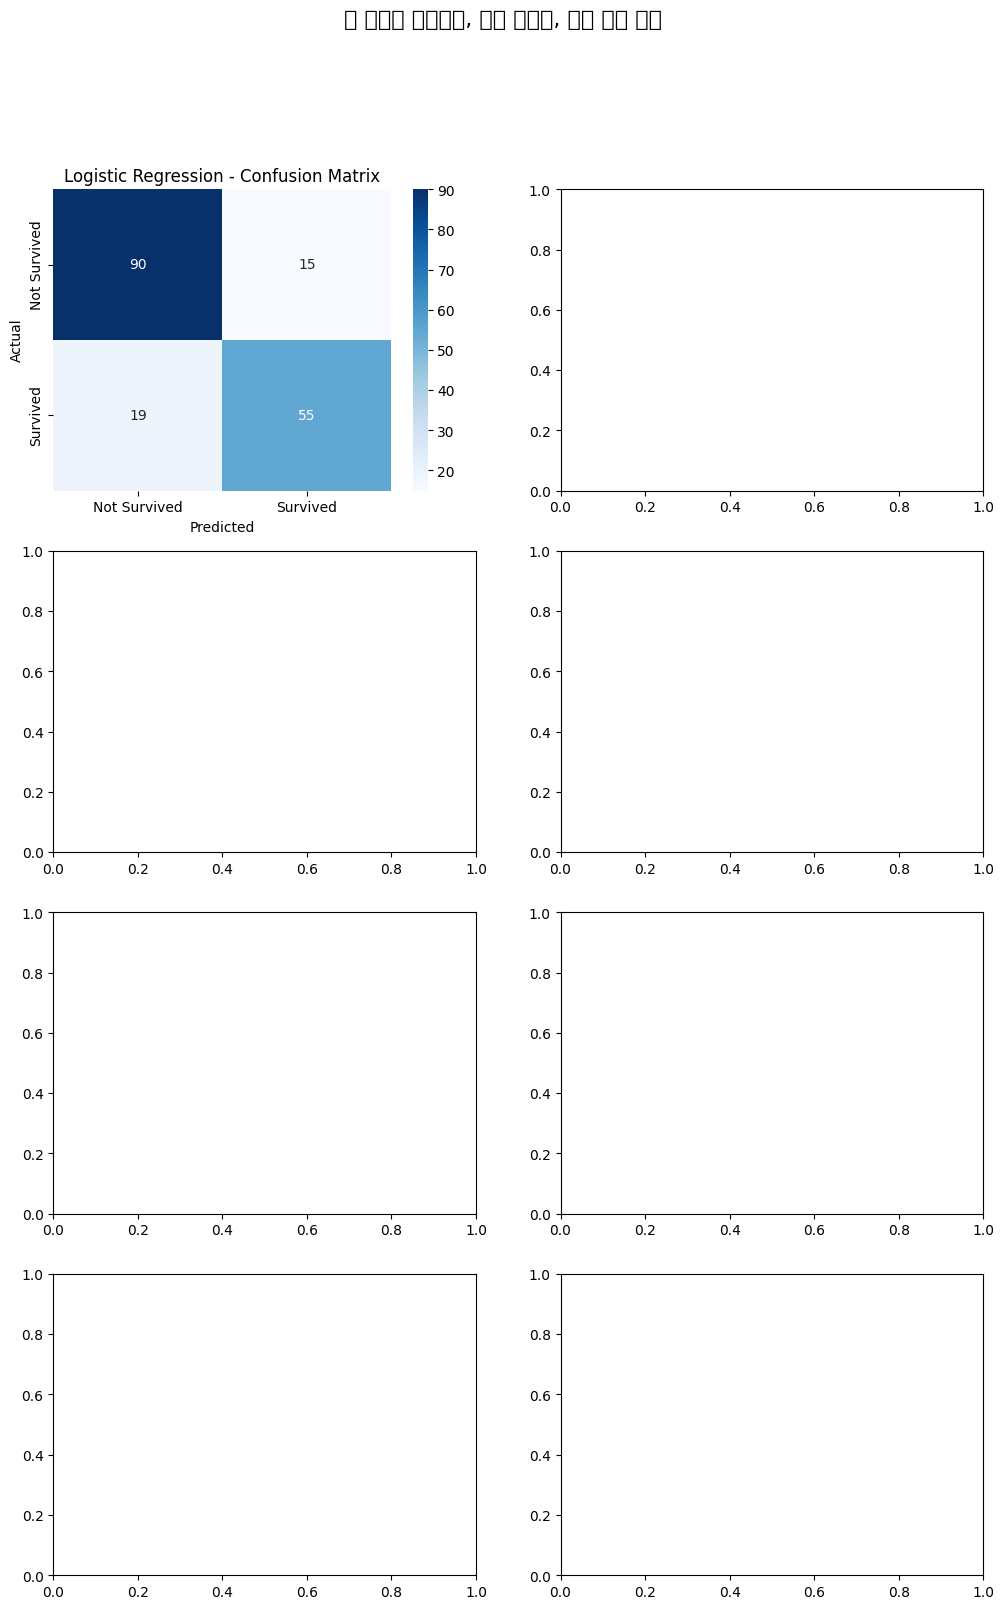

In [18]:
# 사전설치 : pip install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("../dataset/titanic.csv", encoding='utf-8')

# 주요 피처 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True) # median 선택 근거?
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # inplace=True?

# 범주형 인코딩
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# 데이터 분리
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42)
}

# 서브플롯 크기 지정
n_models = len(models)
fig, axes = plt.subplots(n_models, 2, figsize=(12, 4.5 * n_models))
fig.suptitle("📊 모델별 혼동행렬, 피처 중요도, 성능 지표 비교", fontsize=16)

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # 혼동 행렬 시각화
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'],
                ax=axes[idx, 0])
    axes[idx, 0].set_title(f"{name} - Confusion Matrix")
    axes[idx, 0].set_xlabel("Predicted")
    axes[idx, 0].set_ylabel("Actual")
    
    # 성능 지표 표기
    acc = accuracy_score(y_test, y_pred)
    prec = report["weighted avg"]["precision"]
    rec = report["weighted avg"]["recall"]
    f1 = report["weighted avg"]["f1-score"]
    axes[idx, 0].text(0, -0.5,
                      f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1-score: {f1:.3f}",
                      fontsize=10, color='black')

    # 중요 피처 시각화
    if hasattr(model, "feature_importances_"):  # 트리 기반 모델
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):  # 선형 모델 (Logistic, SVM)
        importances = np.abs(model.coef_[0])
    else:
        importances = np.zeros(X.shape[1])  # 예외 방지용

    sorted_idx = np.argsort(importances)
    sns.barplot(x=importances[sorted_idx], y=np.array(features)[sorted_idx], ax=axes[idx, 1])
    axes[idx, 1].set_title(f"{name} - Feature Importance")
    axes[idx, 1].set_xlabel("Importance")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목과 겹치지 않게
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 데이터 불러오기 및 전처리
df = pd.read_csv("../dataset/titanic.csv", encoding='utf-8')
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42)
}

# 서브플롯 크기 지정
n_models = len(models)
fig, axes = plt.subplots(n_models, 2, figsize=(12, 4.5 * n_models))
fig.suptitle("📊 모델별 혼동행렬, 피처 중요도, 성능 지표 비교", fontsize=16)

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # 혼동 행렬 시각화
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'],
                ax=axes[idx, 0])
    axes[idx, 0].set_title(f"{name} - Confusion Matrix")
    axes[idx, 0].set_xlabel("Predicted")
    axes[idx, 0].set_ylabel("Actual")
    
    # 성능 지표 표기
    acc = accuracy_score(y_test, y_pred)
    prec = report["weighted avg"]["precision"]
    rec = report["weighted avg"]["recall"]
    f1 = report["weighted avg"]["f1-score"]
    axes[idx, 0].text(0, -0.5,
                      f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1-score: {f1:.3f}",
                      fontsize=10, color='black')

    # 중요 피처 시각화
    if hasattr(model, "feature_importances_"):  # 트리 기반 모델
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):  # 선형 모델 (Logistic, SVM)
        importances = np.abs(model.coef_[0])
    else:
        importances = np.zeros(X.shape[1])  # 예외 방지용

    sorted_idx = np.argsort(importances)
    sns.barplot(x=importances[sorted_idx], y=np.array(features)[sorted_idx], ax=axes[idx, 1])
    axes[idx, 1].set_title(f"{name} - Feature Importance")
    axes[idx, 1].set_xlabel("Importance")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목과 겹치지 않게
plt.show()
